<font size=7> Latencies Analysis

In [9]:
import pickle
from human_hip.spike_data import curate_latencies, plot_raster_latency_pairs, plot_vector_layout, plot_latency_dist_hist, plot_latency_angle_hist, \
                                 plot_cross_sttc_pairs, latencies
from human_hip.animate import animate_latencies
import human_hip.spike_data as spike_data

In [1]:
from human_hip.spike_data import curate_latencies, plot_raster_latency_pairs, plot_vector_layout, cross_sttc, plot_pair_analysis, plot_cross_sttc_pairs
import pickle
import matplotlib.pyplot as plt
from ipywidgets import interact_manual
import numpy as np
import pickle
from ipywidgets import interact_manual, interact

In [5]:
#sd = spike_data.read_phy_files("/workspaces/human_hippocampus/data/ephys/2023-11-13-e-Hc110723_hckcr1_21841/elliott/hc110723_2.zip")
with open("hc110723_sd.pkl", "rb") as f:
    sd = pickle.load(f)

In [6]:
from ipywidgets import interact_manual, interact
import matplotlib.cm as cm
from matplotlib.ticker import MaxNLocator

def plot_latency_angle_hist( sd, pairs, pair_latencies, by_firing_rate=True ):
    """
    Inputs:
        sd: SpikeData object
        pairs: np.array of neuron indices (as pairs) for which a connection exists, ex: [[0,1], [0,2], [2,3]]
        by_firing_rate: boolean, if True, the angle histogram will be weighted by the number of latencies for each pair
        late_cutoff_low: integer, the lower bound of the latency cutoff
        late_cutoff_high: integer, the upper bound of the latency cutoff
    Outputs:
        A plot depicting the histogram of the angles of the pairs
    """
    neuron_xy = []
    for neuron in sd.neuron_data[0].values():
        neuron_xy.append( [neuron['position'][0], neuron['position'][1]] )
    neuron_xy = np.array(neuron_xy)
    
    # We assume pair point in same direction

    # Creat arrows show angle of information flow from a neuron
    starts = neuron_xy[ pairs[:,0] ]  # Get the x/y locations of the start and end neurons of each pair
    ends = neuron_xy[ pairs[:,1] ]
    angle = np.arctan2(-(ends[:,1]-starts[:,1]), ends[:,0]-starts[:,0]) * -1

    if by_firing_rate:
        latency_counts= []
        for a_latency in pair_latencies:
            latency_counts.append( sum(a_latency>0) )
        latency_counts= np.array(latency_counts)
        angle = np.repeat( angle, latency_counts )

    #n_bins = 30  # You can adjust the number of bins here
    counts, bin_edges = np.histogram(angle,  density=True)  #bins=n_bins,
    bin_width = np.diff(bin_edges)
    cmap = cm.get_cmap('hsv')
    bin_angles= (bin_edges[:-1] - bin_edges.min()) / (bin_edges.max() - bin_edges.min())
    bin_angles = bin_angles[::-1] #+ .05
    bin_colors = cmap(bin_angles)

    ax = plt.subplot(111, polar=True)
    for idx, count in enumerate(counts):
        ax.bar(bin_edges[idx], count, width=bin_width[idx], color=bin_colors[idx], align='edge')
    #ax.set_yticks([0,.1,.2,.3,.4])
    ax.yaxis.set_major_locator(MaxNLocator(5))
    plt.title('Pair Angle Histogram')
    plt.show()

# Get Latencies

In [7]:
count = 0
for i in range(sd.N):
    for j in range(i+1,sd.N):
        count+=1
        if count % 1000 == 0:
            print(f"Count has reached {count}")

Count has reached 1000
Count has reached 2000
Count has reached 3000
Count has reached 4000
Count has reached 5000


In [12]:
pairs = []                            # get list (without duplicates) of all pairs above cutoff (excluding diagonal)
all_latencies = []
count = 0
for i in range(sd.N):
    for j in range(i+1,sd.N):
        count+=1
        if count % 1000 == 0:
            print(f"Count has reached {count}")
        try:
            all_latencies.append(  latencies( i, j, sd, ms_cutoff_high=150) )
            pairs.append([i,j])
        except:
            pass
        


Count has reached 1000
Count has reached 2000
Count has reached 3000
Count has reached 4000
Count has reached 5000


In [14]:
print(len(all_latencies))
print(len(pairs))

5801
5801


(array([3.425e+03, 4.780e+02, 2.880e+02, 1.280e+02, 1.650e+02, 1.400e+02,
        9.400e+01, 5.400e+01, 6.000e+01, 6.700e+01, 6.100e+01, 4.500e+01,
        4.500e+01, 3.600e+01, 4.100e+01, 2.700e+01, 3.400e+01, 2.400e+01,
        2.800e+01, 2.100e+01, 2.000e+01, 2.500e+01, 3.000e+01, 2.500e+01,
        2.000e+01, 1.800e+01, 1.100e+01, 2.400e+01, 1.700e+01, 1.500e+01,
        1.900e+01, 2.200e+01, 2.000e+01, 1.600e+01, 1.600e+01, 1.400e+01,
        2.200e+01, 1.200e+01, 1.200e+01, 7.000e+00, 5.000e+00, 6.000e+00,
        6.000e+00, 7.000e+00, 1.300e+01, 6.000e+00, 2.000e+00, 6.000e+00,
        7.000e+00, 1.000e+01, 5.000e+00, 7.000e+00, 4.000e+00, 3.000e+00,
        7.000e+00, 0.000e+00, 3.000e+00, 2.000e+00, 2.000e+00, 2.000e+00,
        6.000e+00, 1.000e+00, 6.000e+00, 3.000e+00, 1.000e+00, 0.000e+00,
        3.000e+00, 3.000e+00, 6.000e+00, 4.000e+00, 0.000e+00, 0.000e+00,
        3.000e+00, 0.000e+00, 1.000e+00, 3.000e+00, 2.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

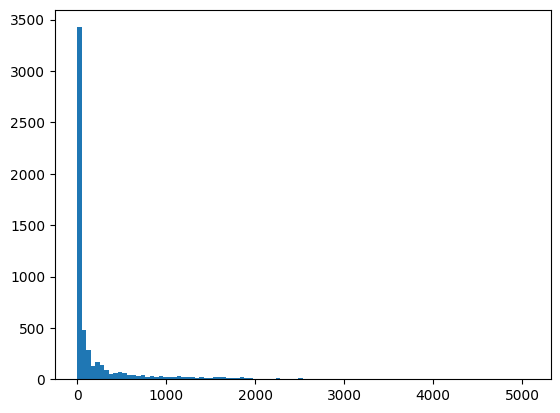

In [15]:
len_all_pair_latencies = []
for i in range(len(all_latencies)):
    len_all_pair_latencies.append(len(all_latencies[i]))
plt.hist(len_all_pair_latencies, bins=100)

In [16]:
curated_latencies = []
curated_pairs = []
for i in range(len(all_latencies)):
    pair_latencies = all_latencies[i]
    if abs(np.mean(pair_latencies))> 20 and len(pair_latencies)>150: #abs(np.median(pair_latencies))> 1.5 and 
        if np.mean(pair_latencies) < 0:
            curated_pairs.append( [ pairs[i][1], pairs[i][0] ] )   #lags_late.append( latency )
            curated_latencies.append( pair_latencies * -1 )
        else:
            curated_pairs.append( pairs[i] ) 
            curated_latencies.append( pair_latencies )
#curated_pairs.append( pairs[i] )
print(len(curated_latencies))
curated_pairs = np.array(curated_pairs)

0


/srv/conda/envs/notebook/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/srv/conda/envs/notebook/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


# Vector Plots

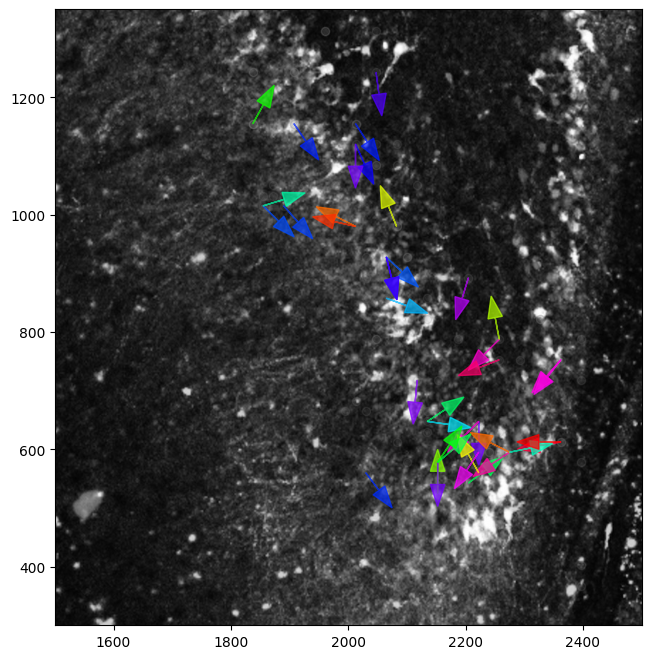

In [8]:
plot_vector_layout( sd, good_pairs, image_path="/workspaces/human_hippocampus/data/histology/hc110723_bw.jpeg",
                   xlim=(1500,2500), ylim=(300,1350) )

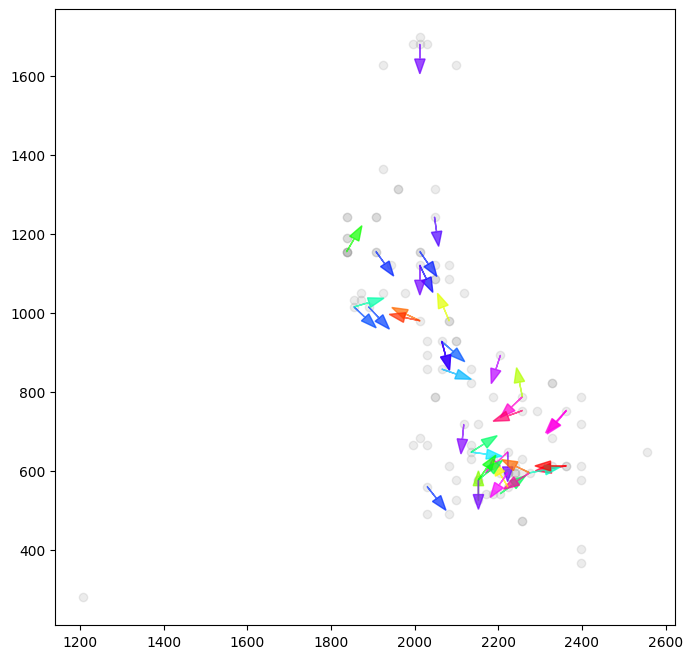

In [11]:
plot_vector_layout( sd, good_pairs)

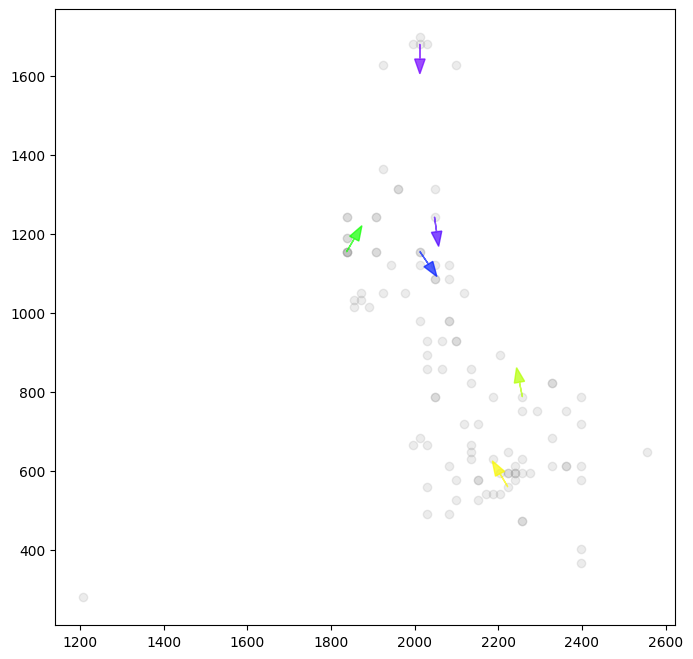

In [12]:
plot_vector_layout( sd, good_pairs, min_dist=500 )

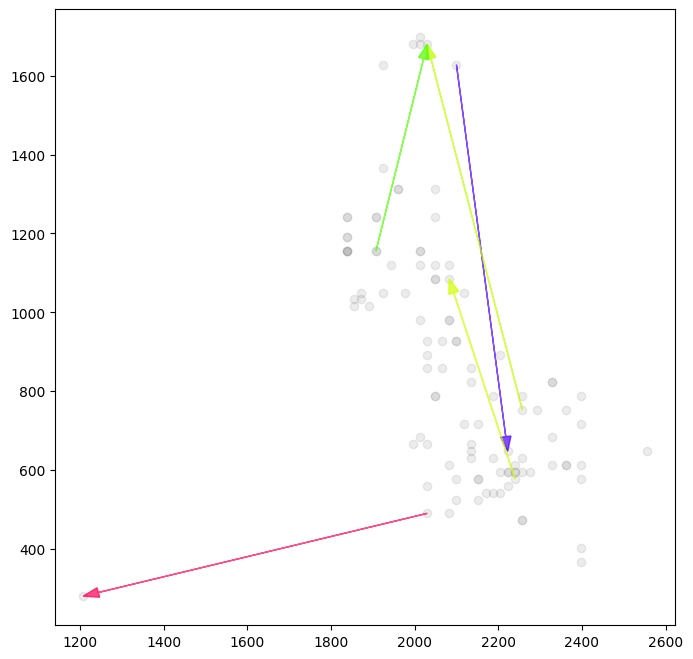

In [13]:
plot_vector_layout( sd, good_pairs, min_dist=500, normalize=False )

# <font color="red">Make Animations - NOT DONE

In [15]:
animate_latencies(plot_vector=True, ms_range=range(0,1000) )

<function human_hip.animate.animate_latency_pairs.animate_latencies(sd, pairs, movie_range_ms=None, frame_interval_ms=500, directed=True, directed_backwards=False, filename='latencies.mp4', latency_ms_cutoff_low=1, latency_ms_cutoff_high=15, plot_vector=False, min_dist=0)>

25781 latency events occured in total spikedata
Making animation of 3.008 minutes
Saved animation to media/latencies.mp4


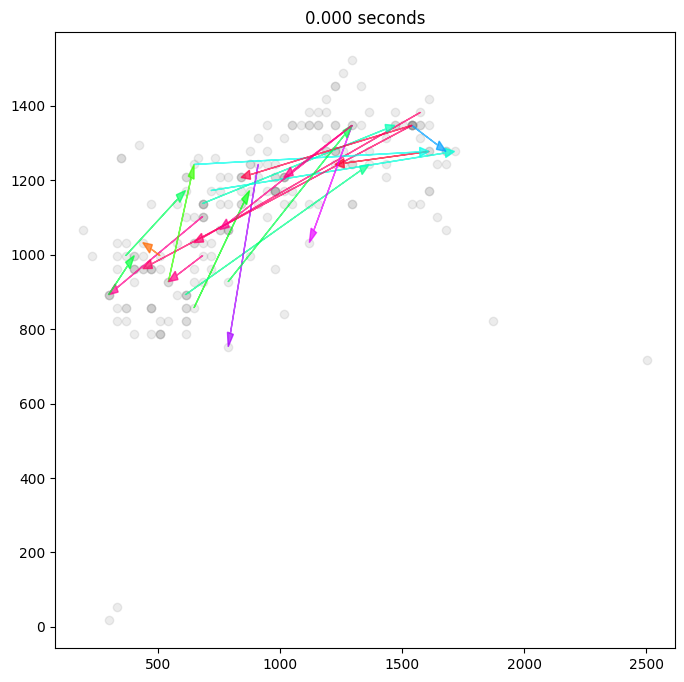

In [14]:
animate_latencies(sd, good_pairs, filename="media/latencies.mp4" )

1860 latency events occured in total spikedata
668 latency events occured above 500 um distance
Making animation of 2.283 minutes
Saved animation to media/latencies_mindist500.mp4


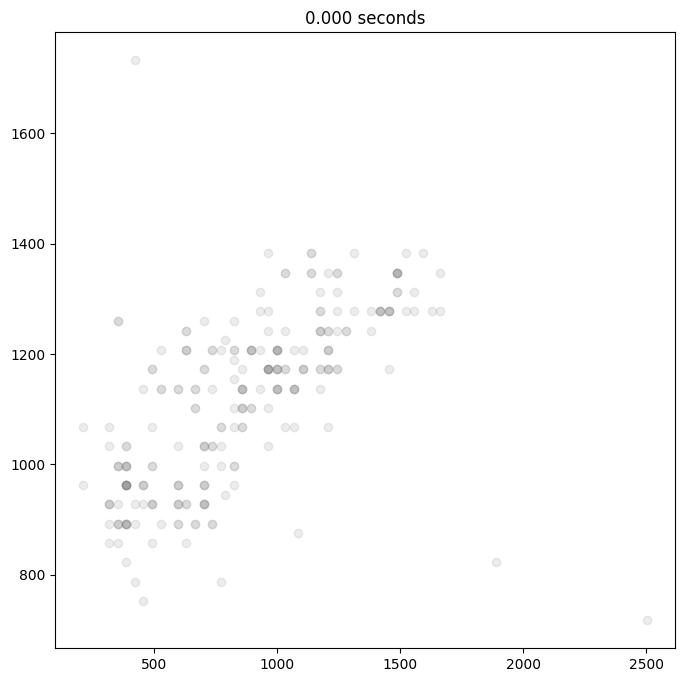

In [13]:
animate_latencies(sd, good_pairs,  filename='media/latencies_mindist500.mp4', min_dist=500 )

In [ ]:
# animate_latencies(sd, pairs, movie_range_ms=None, frame_interval_ms=500, directed=True, filename="latencies.mp4",
#                       latency_ms_cutoff_low=0, latency_ms_cutoff_high=15 ):